# Attrition Analysis in Python (Second Part of the project)

In this notebook, we will continue the analysis that we have started in the previous part of this project which was done in R. The previous part of the project can be consulted in the following links:

 - For consulting directly as an HTML webpage: https://stefananca98.github.io/Attrition-Analysis-with-R/
 - For consulting the project repository: https://github.com/StefanAnca98/Attrition-Analysis-with-R

The main objective of this notebook is to improve the analysis that was made previously and not only to do a general analysis of the dataset. In this notebook, we will follow the recommendations provided at the end of the previous project to improve the results obtained. The goal of this project is to **improve the results of the last analysis** getting more refined models, and not only testing them in a general way.

# 1 - EXPLORATORY DATA ANALYSIS

In [42]:
# Importing packages used in this notebook
import pandas as pd

## 1.1 - Loading the data

We will load the data in the same state as the obtained data in the previous project after processing it. This data has some variables with multiple versions (original variables, discretized, standardized...). However, in this project **we are not going to use these versions**, we are loading this version of the dataset because it contains 2 variables obtained from applying different conditions to other variables ("LowSatisfaction" and "HighSatisfaction" variables). So, in this first stage, we will delete all the versions of the variables that are not the original variables or the mentioned variables obtained from applying conditions.

In [43]:
# The same name that was used in the previous project will be used for this project
HR_data = pd.read_csv('data/WorkingAttritionProcessed.csv')

In [44]:
print(HR_data.shape)

(1470, 62)


In [45]:
# We set the maximum possible columns to be displayed to 62 (the number of columns of the dataset)
pd.set_option('display.max_columns', 62);
# We show the first rows of all the variables
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,High_satisfaction,Low_satisfaction,MonthlyIncome_scaled,NumCompaniesWorked_scaled,TotalWorkingYears_scaled,TrainingTimesLastYear_scaled,YearsAtCompany_scaled,YearsInCurrentRole_scaled,YearsSinceLastPromotion_scaled,YearsWithCurrManager_scaled,Age_scaled,DailyRate_scaled,DistanceFromHome_scaled,HourlyRate_scaled,MonthlyRate_scaled,PercentSalaryHike_scaled,MonthlyIncome_discret,NumCompaniesWorked_discret,TotalWorkingYears_discret,TrainingTimesLastYear_discret,YearsAtCompany_discret,YearsInCurrentRole_discret,YearsSinceLastPromotion_discret,YearsWithCurrManager_discret,Age_discret,DailyRate_discret,DistanceFromHome_discret,HourlyRate_discret,MonthlyRate_discret,PercentSalaryHike_discret
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0.416310,0.942809,0.447214,0.000000,0.387298,0.471405,0.000000,0.542326,0.547619,0.715820,0.000000,0.914286,0.698053,0.000000,"[0.272,0.484)","[0.666,1]","[0.441,0.629)","[0,0.312)","[0.284,0.448)","[0.181,0.501)","[0,0.153)","[0.424,0.687)","[0.448,0.681)","[0.483,0.739)","[0,0.161)","[0.756,1]","[0.497,0.745)","[0,0.117)"
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,1,10,3,3,10,7,1,7,0,0,0.363503,0.333333,0.500000,0.707107,0.500000,0.623610,0.258199,0.641689,0.738095,0.126700,0.250000,0.442857,0.916001,0.857143,"[0.272,0.484)","[0.167,0.43)","[0.441,0.629)","[0.312,0.72)","[0.448,0.633)","[0.501,0.748)","[0.153,0.46)","[0.424,0.687)","[0.681,1]","[0,0.236)","[0.161,0.43)","[0.261,0.509)","[0.745,1]","[0.62,1]"
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,0,7,3,3,0,0,0,0,0,0,0.127235,0.816497,0.418330,0.707107,0.000000,0.000000,0.000000,0.000000,0.452381,0.909807,0.035714,0.885714,0.012126,0.285714,"[0,0.272)","[0.666,1]","[0.281,0.441)","[0.312,0.72)","[0,0.284)","[0,0.181)","[0,0.153)","[0,0.424)","[0.448,0.681)","[0.739,1]","[0,0.161)","[0.756,1]","[0,0.247)","[0.117,0.332)"
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0.202187,0.333333,0.447214,0.707107,0.447214,0.623610,0.447214,0.000000,0.357143,0.923407,0.071429,0.371429,0.845814,0.000000,"[0,0.272)","[0.167,0.43)","[0.441,0.629)","[0.312,0.72)","[0.284,0.448)","[0.501,0.748)","[0.153,0.46)","[0,0.424)","[0.255,0.448)","[0.739,1]","[0,0.161)","[0.261,0.509)","[0.745,1]","[0,0.117)"
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,1,6,3,3,2,2,2,2,0,0,0.247371,1.000000,0.387298,0.707107,0.223607,0.333333,0.365148,0.342997,0.214286,0.350036,0.035714,0.142857,0.583738,0.071429,"[0,0.272)","[0.666,1]","[0.281,0.441)","[0.312,0.72)","[0,0.284)","[0.181,0.501)","[0.153,0.46)","[0,0.424)","[0,0.255)","[0.236,0.483)","[0,0.161)","[0,0.261)","[0.497,0.745)","[0,0.117)"


In [46]:
# We will also take a look at the names of the columns
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'High_satisfaction', 'Low_satisfaction', 'MonthlyIncome_scaled',
       'NumCompaniesWorked_scaled', 'TotalWorkingYears_scaled',
       'TrainingTimesLastYear_scaled', 'YearsAtCompany_scaled',
       'YearsInCurrentRole_scaled', 'YearsSinceLastPromotion_scaled',
       'YearsWithCurrManager_scaled', 'Age_scaled', 'DailyRate_scaled',
       'DistanceFromHome_scal

In [47]:
# Now, we will select only the original variables and "Low_satisfaction" and "High_satisfaction
# We get the index of the first satisfaction variable (all the rest transformed variables are the following variables until the end of the dataset)
start_index = HR_data.columns.get_loc("MonthlyIncome_scaled")
# We exclude all the variables from this index
HR_data = HR_data.loc[:, HR_data.columns[:start_index]]
HR_data.shape

(1470, 34)

In [48]:
print(HR_data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'High_satisfaction', 'Low_satisfaction'],
      dtype='object')


We can see, how the last variable now is "Low_satisfaction", and we can compare this otput with the "colnmaes" output before excluding the variables. In the current case, only the original variables and "High_satisfaction" and "Low_satisfaction" are still in the dataset.

## 1.2 - Dataset fragmentation

In this section, we will create independent datasets for each type of variable that we have in the original dataset. We will create different datasets for the following cases:

**Target variable:** The "Attrition" variable will be in an independent dataset, called "Y".

**Original satisfaction variables:** All the variables related to "satisfaction" that were part of the original dataset ("Low_satisfaction" and "High_satisfaction" will not be included in this dataset).

**Satisfaction variables obtained from applying conditions to original variables:** These variables are "Low_Satisfaction" and "High_Satisfaction").

**Categorical variables:** All the categorical variables will be stored in a different dataset.

**Numeric continuous variables:** All the continuous numeric variables will be stored in another dataset.

The reason of this fragmentation is a conceptual separation of the data. In first place, the target variable is the variable to predict, as we will train mutiple models using **scikit-learn** we need to have this variable in a separated dataset. On the other hand, both versions of the satisfaction variables, as there are not independent, aren't going to be used simulteneously in a training process, we will have to choose one of these (the original satisfaction variables, or those obtained from applying conditions to the original variables). In relation to the categorical variables and the numerical continuous variables, as their caracteristics are diffrent and may require diffrent analysis and manipulations (in the case that are conducted), is easier to handle them if there are in separated dataframes.

This will allow us to create the training and test datasets with the required variations in the preprocessing, ad hoc, depending on the context and the trained model. We will be able to previously do the required manipulations to any of the dataset, and after append all that are going to be used for training a model in a single dataset.

In [49]:
Y = HR_data['Attrition'].to_frame()
Y.columns

Index(['Attrition'], dtype='object')

In [50]:
original_satisfaction = HR_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']]
original_satisfaction.columns

Index(['JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction'],
      dtype='object')

In [51]:
obtained_satisfaction = HR_data[['High_satisfaction', 'Low_satisfaction']]
obtained_satisfaction.columns

Index(['High_satisfaction', 'Low_satisfaction'], dtype='object')

In [52]:
numeric_variables = HR_data[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
                             'PercentSalaryHike']]
numeric_variables.columns

Index(['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DailyRate',
       'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike'],
      dtype='object')

During the previous dataset selections, we chose all non-categorical variables. If we now select the variables that were not included in any of the previous datasets, we will obtain a data frame containing all the categorical variables (excluding the target variable and those related to satisfaction).

In [53]:
# We create a list with the names of all the variables that we selected (We also include "Over18" as all their values are the same)
selected_variables = list(original_satisfaction.columns) + list(obtained_satisfaction.columns) + list(Y) + list(numeric_variables.columns) + list(["Over18"])
# Now we create a dataset where these variables are excluded
categorical_variables = HR_data.drop(columns=selected_variables)
categorical_variables.columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')

## 1.3 - Description of the data

As is pointed out in the conclusions of the previous project, the **Exploratory Data Analysis** (EDA) that was made, was very generic. In this project, the EDA will focus more on our goal, predicting and understanding how job abandonment occurs.

Nevertheless, first, we will make a general summary of the data.

### 1.3.1 - General Overview of the Data

<div class="alert alert-block alert-success">
<strong>TARGET VARIABLE</strong>

</div>

<Axes: xlabel='Attrition'>

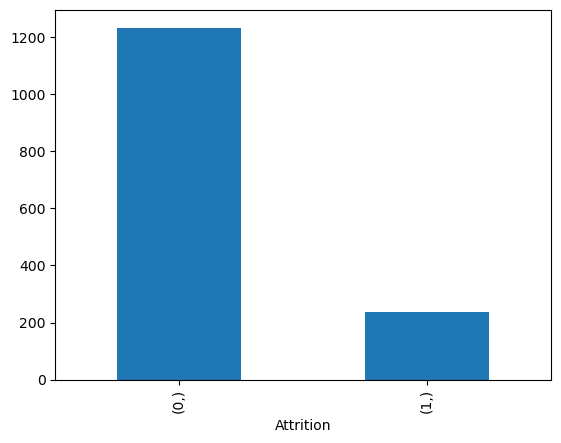

In [54]:
# We import some visualisation datasets
import matplotlib
import matplotlib.pyplot as plt

# We create a barplot of the target value
Y.value_counts().plot(kind='bar')

As we already know from the previous project, the classes of this variable are unbalanced, this is something that we will handle before training any model.

<div class="alert alert-block alert-success">
<strong>SATISFACTION VARIABLES</strong>

</div>

For the original satisfaction variables we will create **histograms**.

In [55]:
original_satisfaction.columns

Index(['JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction'],
      dtype='object')

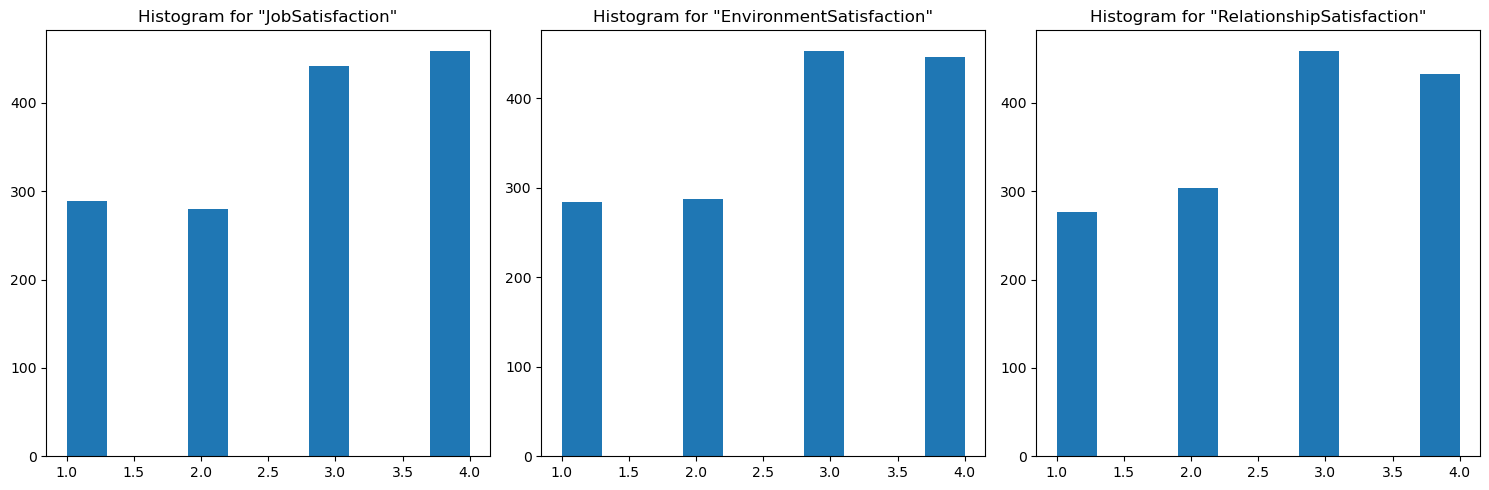

In [56]:
# We create the histograms

# We create a figure with 3 subplots in one row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# JobSatisfaction Histogram
axs[0].hist(original_satisfaction['JobSatisfaction'])
axs[0].set_title('Histogram for "JobSatisfaction"')

# EnvironmentSatisfaction Histogram
axs[1].hist(original_satisfaction['EnvironmentSatisfaction'])
axs[1].set_title('Histogram for "EnvironmentSatisfaction"')

# RelationshipSatisfaction Histogram
axs[2].hist(original_satisfaction['RelationshipSatisfaction'])
axs[2].set_title('Histogram for "RelationshipSatisfaction"')

# Visualization of the histograms
plt.tight_layout()
plt.show()

And now, we will use **pie plots** for the satisfaction variables obtained applying conditions to the original satisfaction variables.

In [57]:
# Consulting the names of all the columns
obtained_satisfaction.columns

Index(['High_satisfaction', 'Low_satisfaction'], dtype='object')

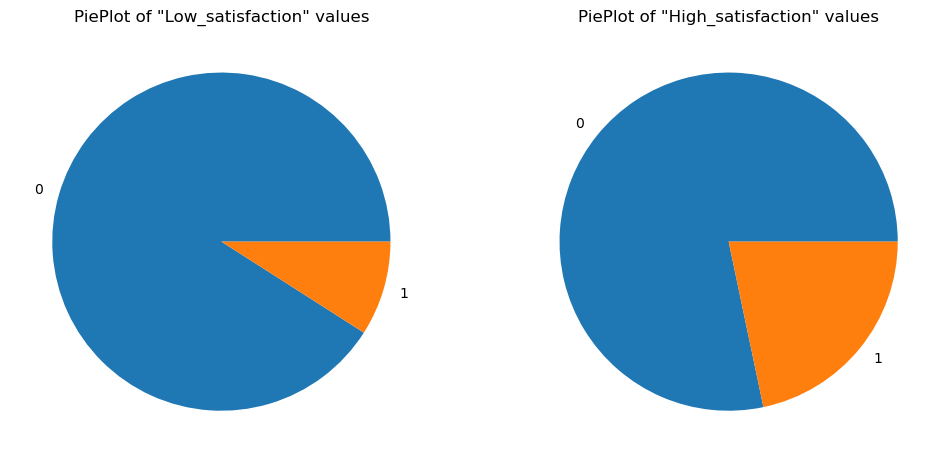

In [58]:
# We create a figure with 2 subplots in one row
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# We count the frequency of each value of "Low_satisfaction" variable
value_counts = obtained_satisfaction['Low_satisfaction'].value_counts()

# Now we create the pie plot
axs[0].pie(value_counts, labels=value_counts.index)
axs[0].set_title('PiePlot of "Low_satisfaction" values')

# We count the frequency of each value of "Low_satisfaction" variable
value_counts = obtained_satisfaction['High_satisfaction'].value_counts()

# Now we create the pie plot
axs[1].pie(value_counts, labels=value_counts.index)
axs[1].set_title('PiePlot of "High_satisfaction" values')
plt.show()

<div class="alert alert-block alert-success">
<strong>CATEGORICAL VARIABLES</strong>

</div>

We will also create **histograms** for these variables.

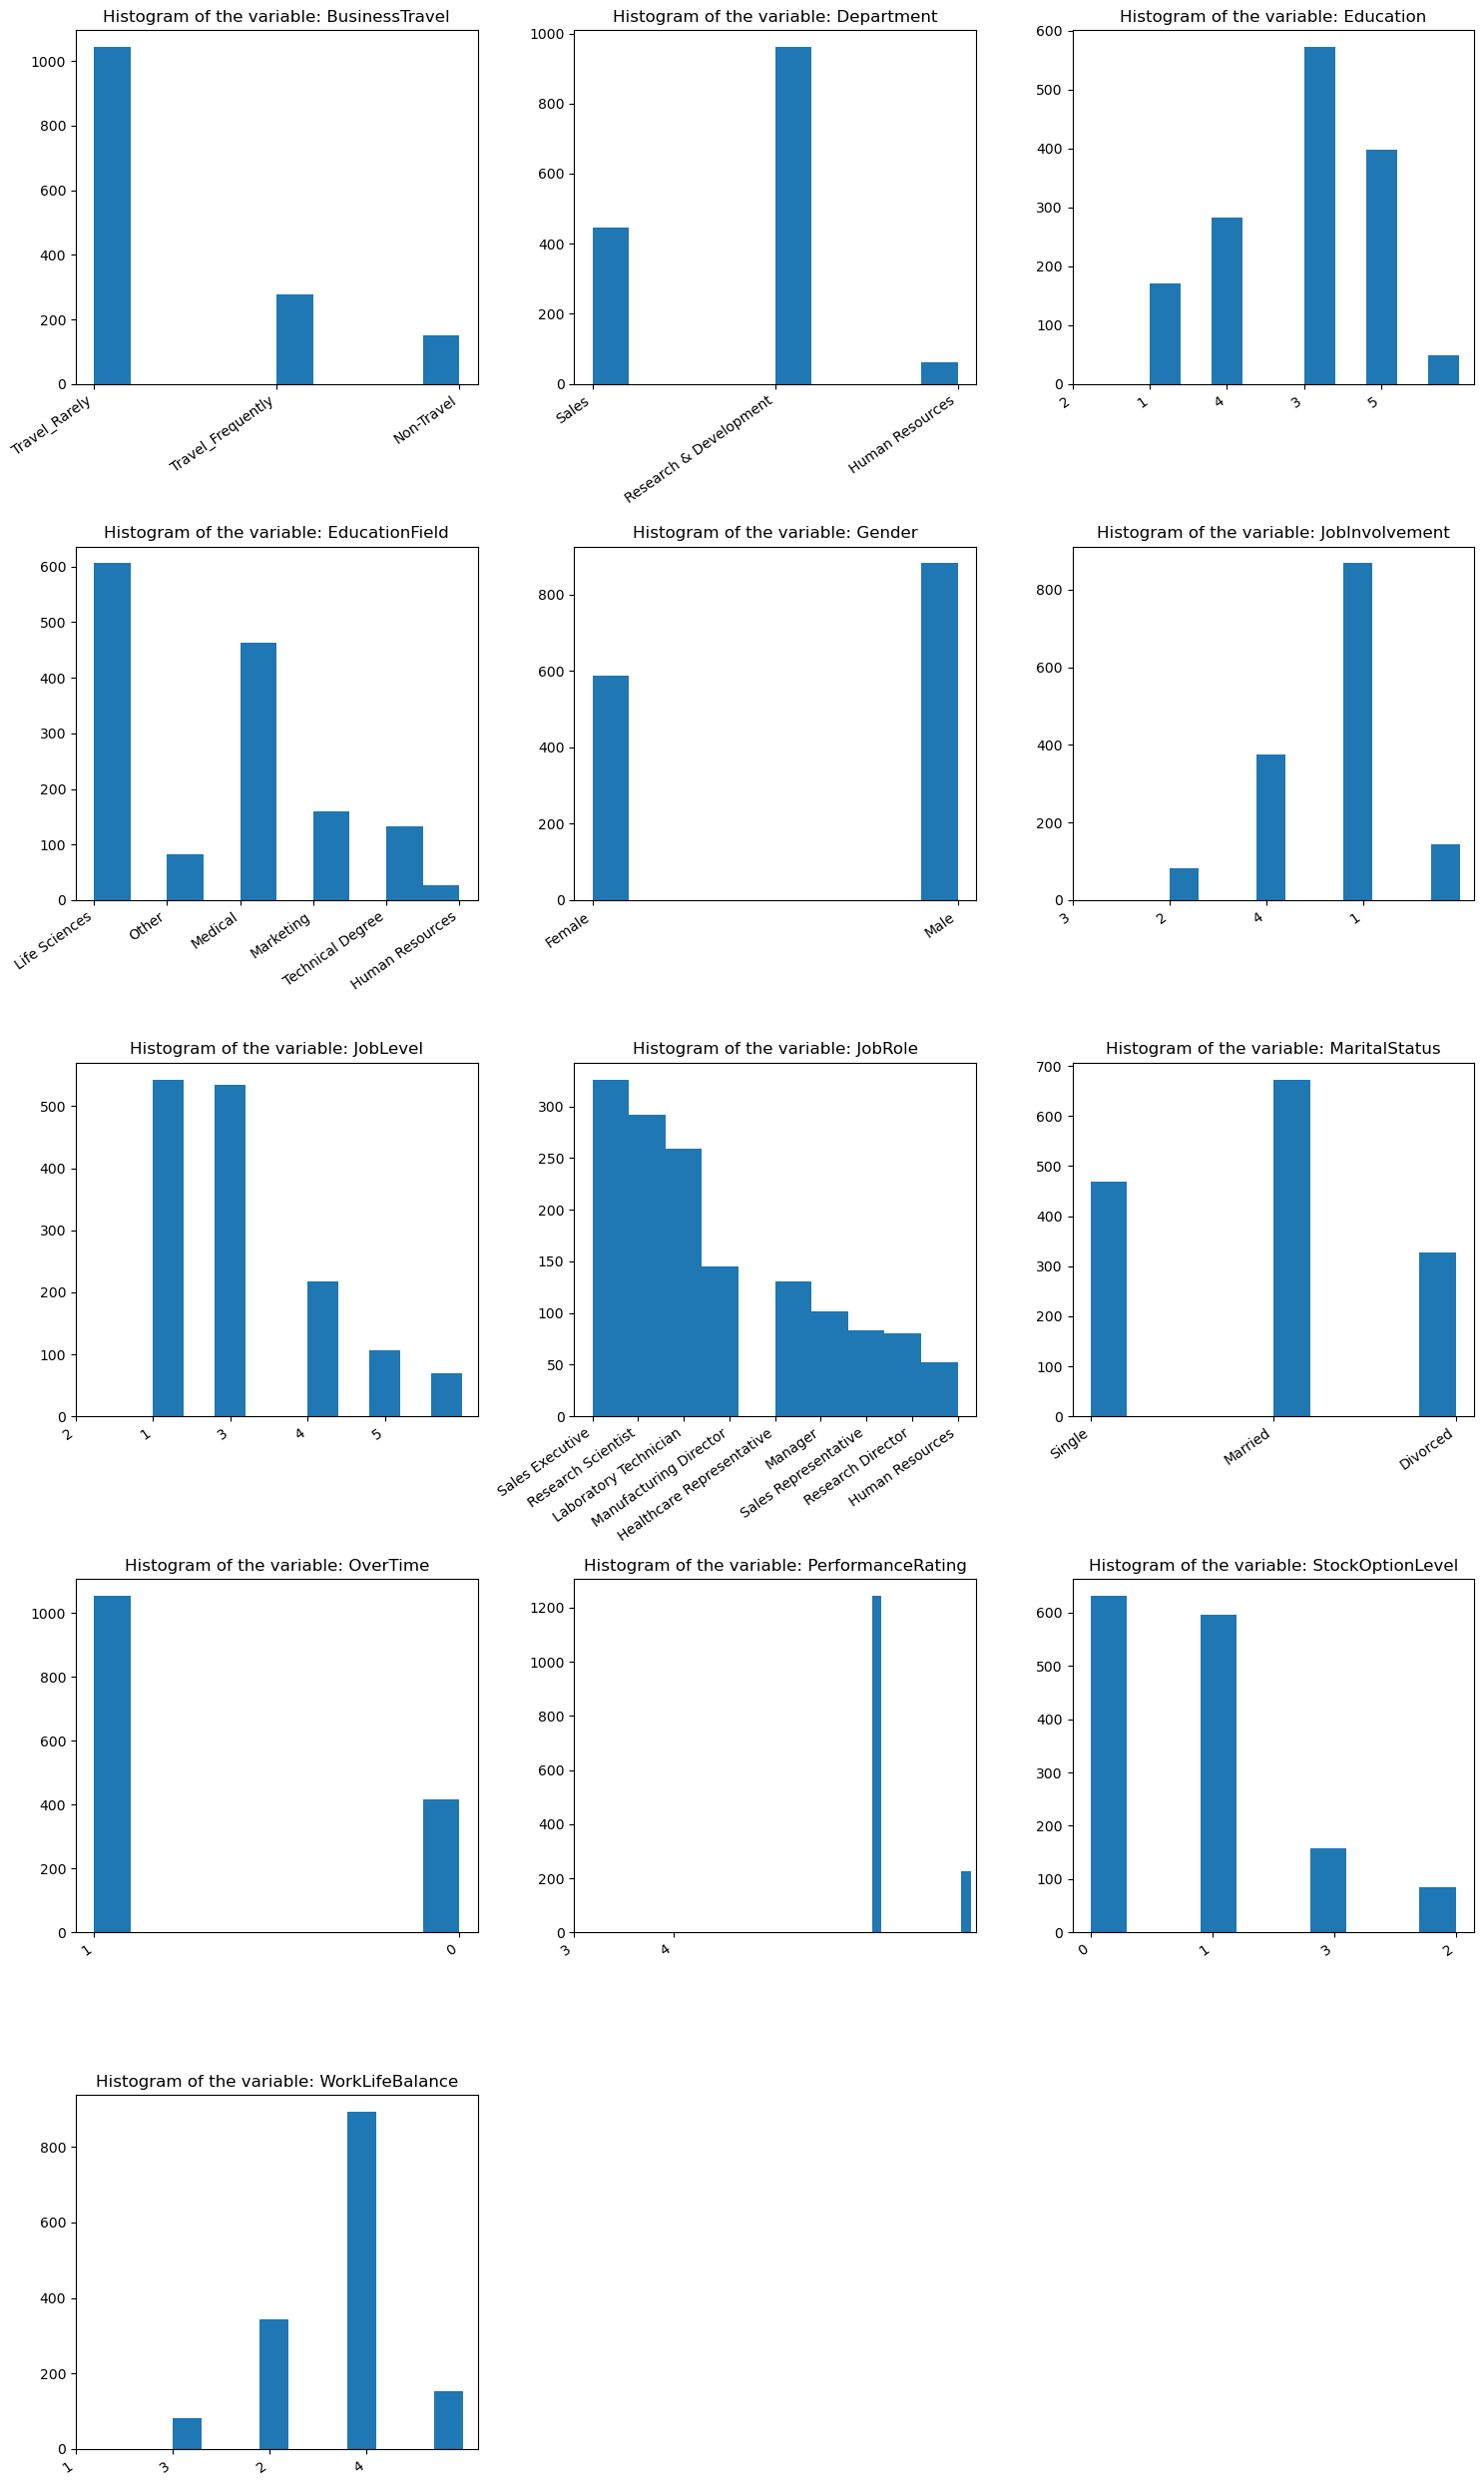

In [59]:
import math
# We will calculate the number of rows of the visualization figure
num_variables = len(categorical_variables.columns)
num_cols = 3  # We will have 3 columns
num_rows = math.ceil(num_variables / num_cols)  # Number of required columns

# We create the subplot with the established number of columns and rows
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# We flatten the "axs" array for an easier iteration
axs = axs.flatten()

# We iterate through each variable and create a histogram for each one
for i, variable in enumerate(categorical_variables.columns):
    axs[i].hist(categorical_variables[variable])
    axs[i].set_title(f"Histogram of the variable: {variable}")
    axs[i].set_xticks(range(len(categorical_variables[variable].unique())))
    axs[i].set_xticklabels(categorical_variables[variable].unique(), rotation=35, ha='right')

# We hide the empty subplots
for j in range(num_variables, len(axs)):
    axs[j].set_visible(False)

# And visualize the result
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<strong>NUMERIC CONTINUOUS VARIABLES</strong>

</div>

In [60]:
numeric_variables.describe()

,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129,36.923810,802.485714,9.192517,65.891156,14313.103401,15.209524
std,4707.956783,2.498009,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136,9.135373,403.509100,8.106864,20.329428,7117.786044,3.659938
min,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,30.000000,2094.000000,11.000000
25%,2911.000000,1.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,465.000000,2.000000,48.000000,8047.000000,12.000000
50%,4919.000000,2.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,802.000000,7.000000,66.000000,14235.500000,14.000000
75%,8379.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,1157.000000,14.000000,83.750000,20461.500000,18.000000
max,19999.000000,9.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1499.000000,29.000000,100.000000,26999.000000,25.000000


### 1.3.2 - Exploratory Data Analysis focusing on the target variable

In the previous project, we made an importance analysis of the variables related to the target variable, the importance of each attribute was:
    
 **DailyRate** 0.000000e+00
 
 **DistanceFromHome** 0.000000e+00
 
 **HourlyRate** 0.000000e+00
 
 **MonthlyRate** 0.000000e+00
 
 **NumCompaniesWorked** 0.000000e+00
 
 **PercentSalaryHike** 0.000000e+00
 
 **TrainingTimesLastYear** 0.000000e+00
 
 **YearsSinceLastPromotion** 0.000000e+00
 
 **PerformanceRating** 4.158349e-06
 
 **Gender** 4.372823e-04
 
 **Education** 1.088435e-03
 
 **High_satisfaction** 1.641157e-03
 
 **Department** 3.568144e-03
 
 **WorkLifeBalance** 4.786845e-03
 
 **EducationField** 5.068077e-03
 
 **Low_satisfaction** 6.118896e-03
 
 **BusinessTravel** 8.081713e-03
 
 **JobInvolvement** 8.732048e-03
 
 **YearsInCurrentRole** 1.307347e-02
 
 **MaritalStatus** 1.496588e-02
 
 **Age** 1.646181e-02
 
 **YearsWithCurrManager** 1.826648e-02
 
 **YearsAtCompany** 1.885243e-02
 
 **TotalWorkingYears** 2.019828e-02
 
 **MonthlyIncome** 2.076296e-02
 
 **StockOptionLevel** 2.098402e-02
 
 **JobLevel** 2.179277e-02
 
 **OverTime** 2.768761e-02
 
 **JobRole** 3.024106e-02

We want to verify if the importance of the variables is reflected visually on the variables. For this verification, we will make histograms where the observations of each class will be differentiated. We will use a function that will create the histograms.

In [61]:
# We will create each histogram using a function
def create_histogram(df, target, feature, activate_axvline=False):
    '''
    This function takes as input a dataframe, the name of the target variable of the dataset, and
    the feature to be graphically represented. The function starts by creating a figure and iterates
    over the unique values of the target variable, so that in each iteration, it filters into an
    individual data frame only the observations of the class with the iterated name and adds the
    corresponding histogram of that variable to the figure. 
    '''
    # Create the figure and a list that will contain the names for the legend
    fig, ax = plt.subplots()
    legend = []
    
    # Iterate over each unique class name
    for class_name in df[target].unique():
        # Add the iterated class name to the list containing the legend names
        legend.append(class_name)
        # Filter the dataframe to get another one with only the observations of the iterated class
        filtered_df = df[df[target] == class_name]
        # Set a color that will be used in this iteration, the color will be the current color of "prop_cycler" in matplotlib
        color = next(ax._get_lines.prop_cycler)['color']
        # Create the histogram
        plt.hist(filtered_df[feature], alpha=0.6, color=color)
        plt.xticks(rotation = 35, ha='right')
        # If the default parameter value "activate_axvline" is changed when calling the function
        # an additional line of code is executed
        if activate_axvline == True:
            # This line creates the vertical line with the value of the mean as required in the next exercise
            plt.axvline(sum(filtered_df[feature]) / filtered_df[feature].size, color=color)
        
    # Add a title and the legend
    plt.title(feature)
    plt.legend(legend)
    plt.show()


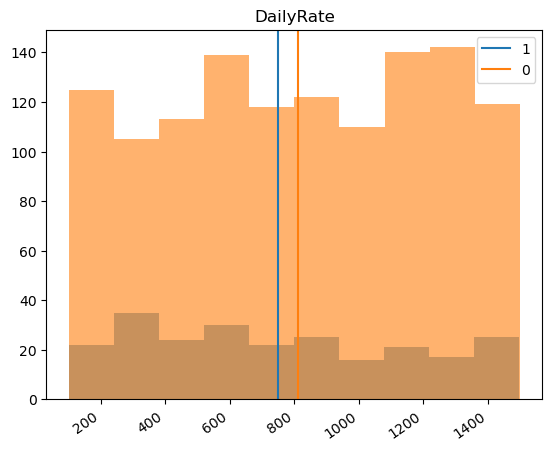

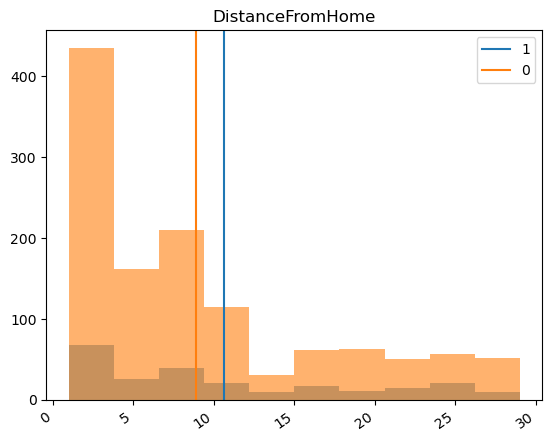

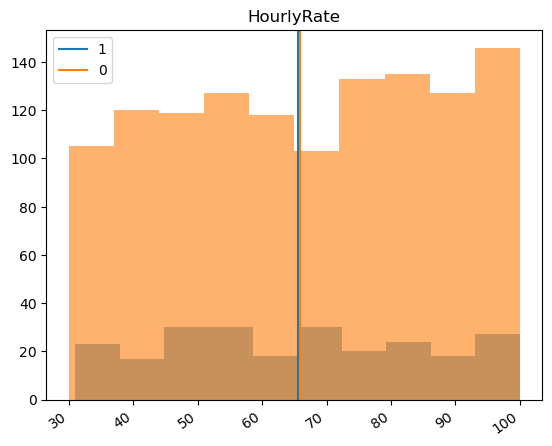

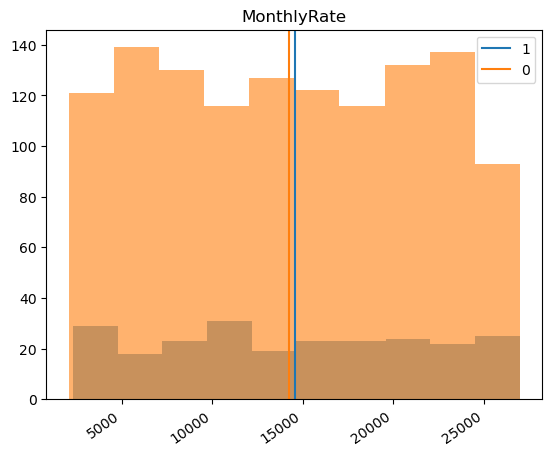

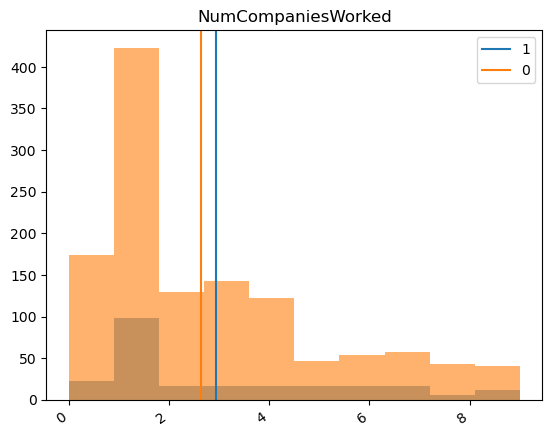

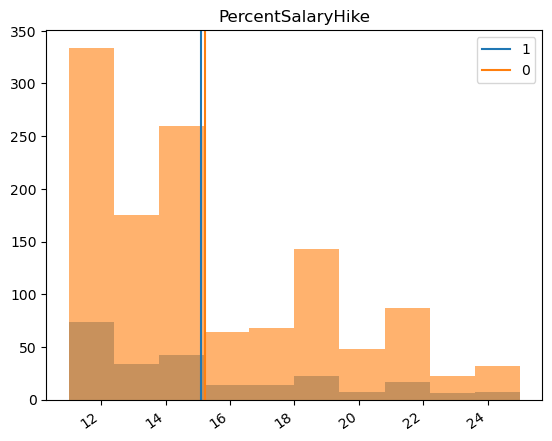

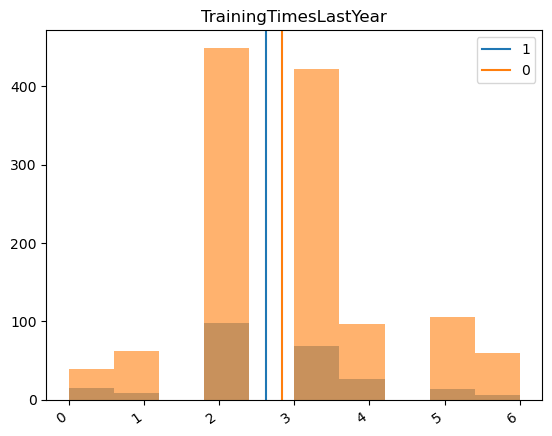

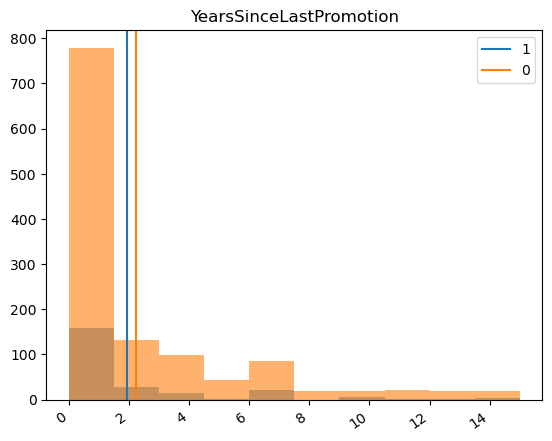

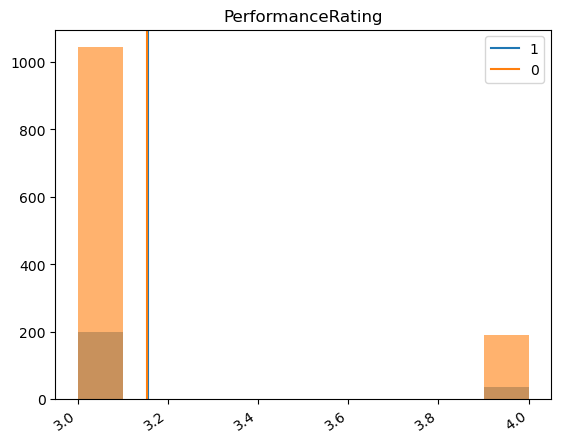

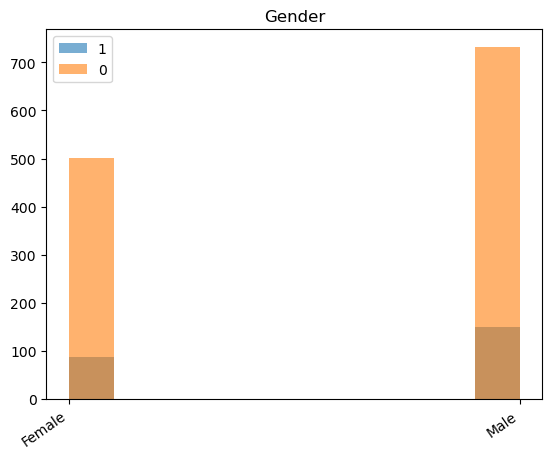

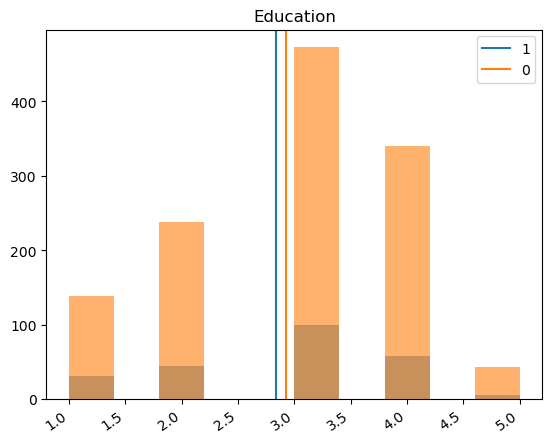

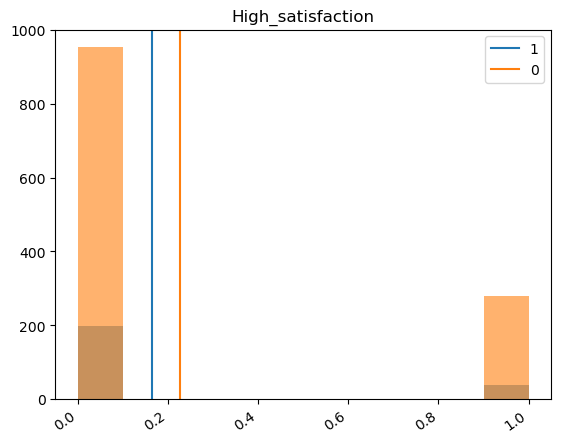

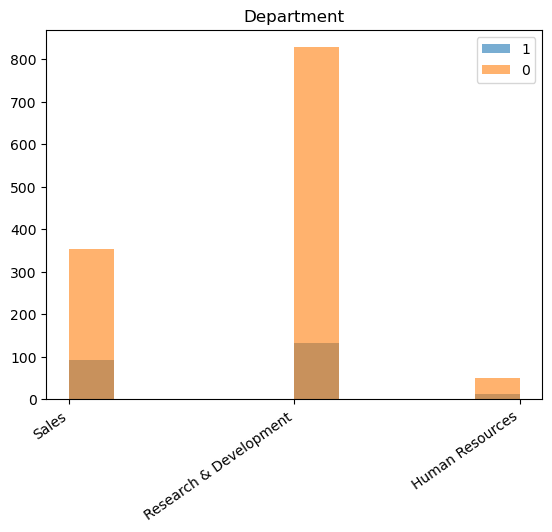

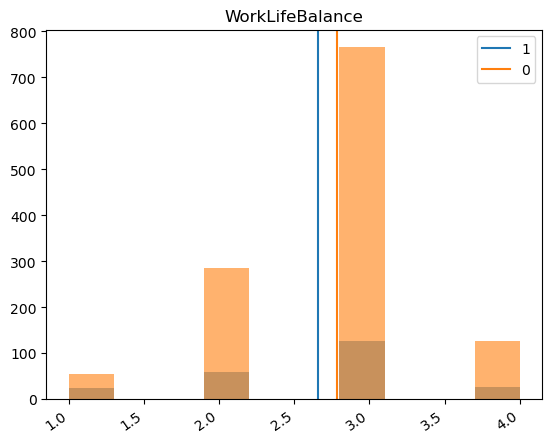

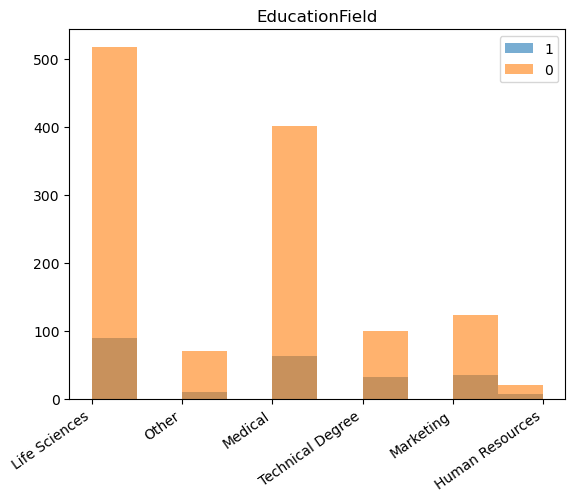

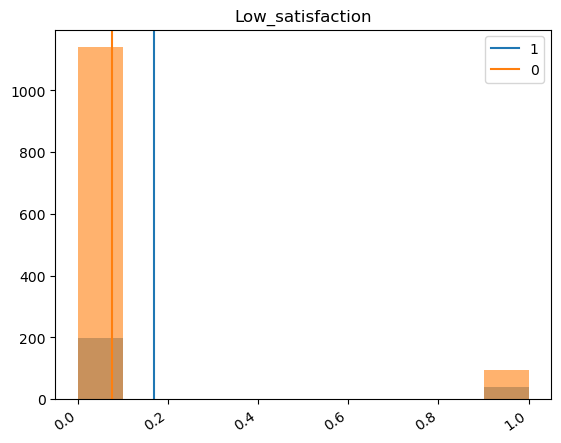

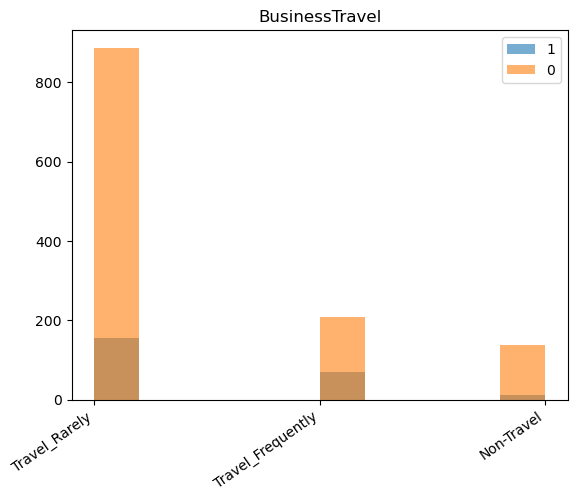

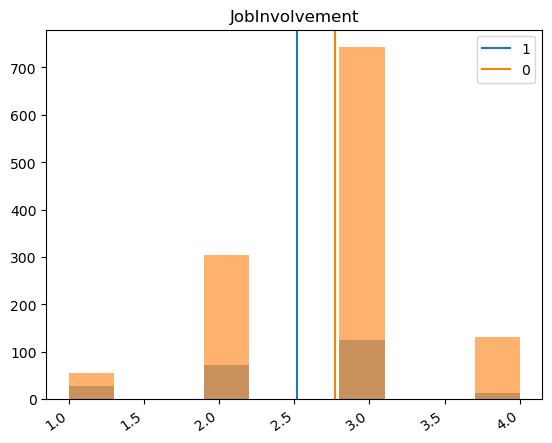

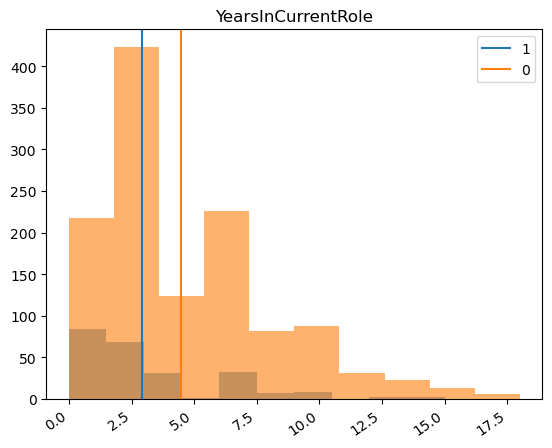

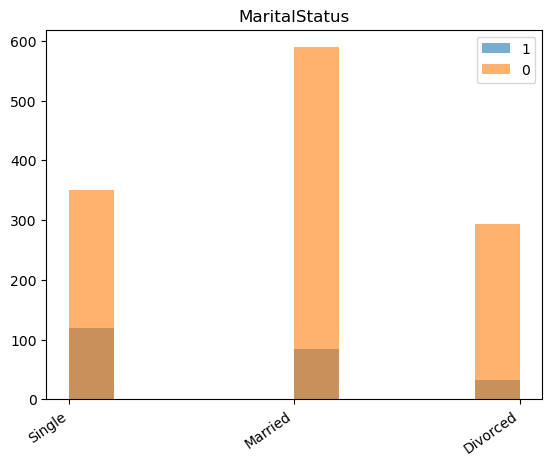

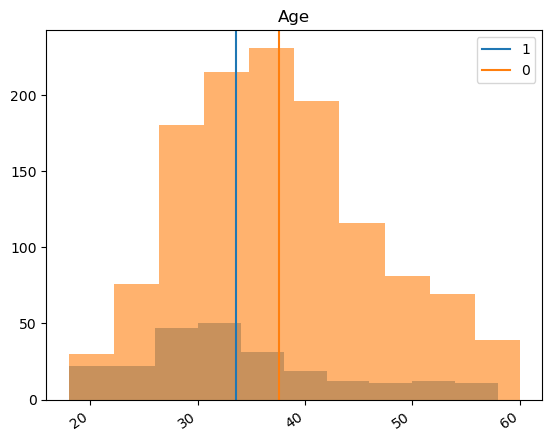

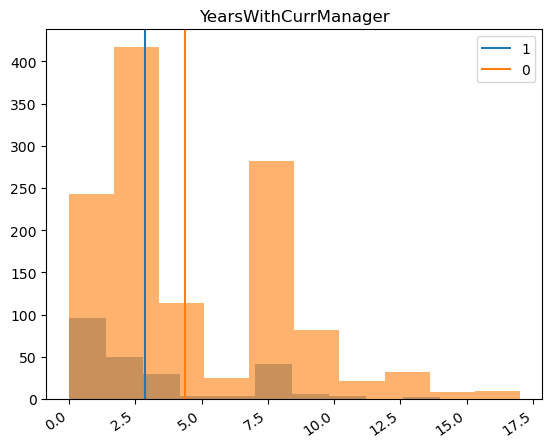

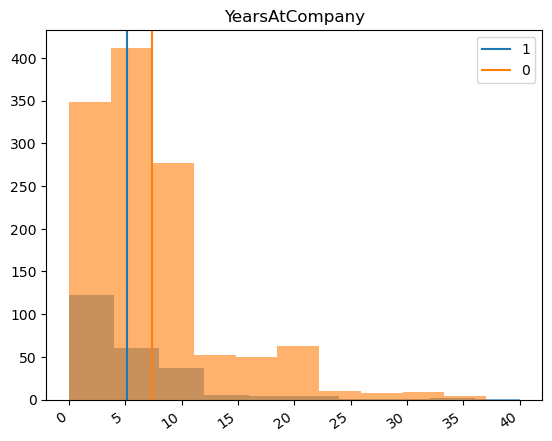

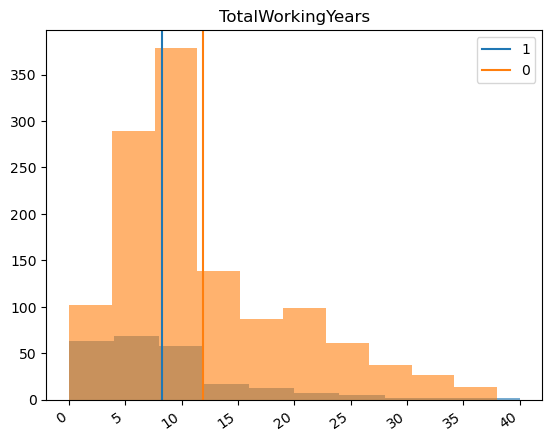

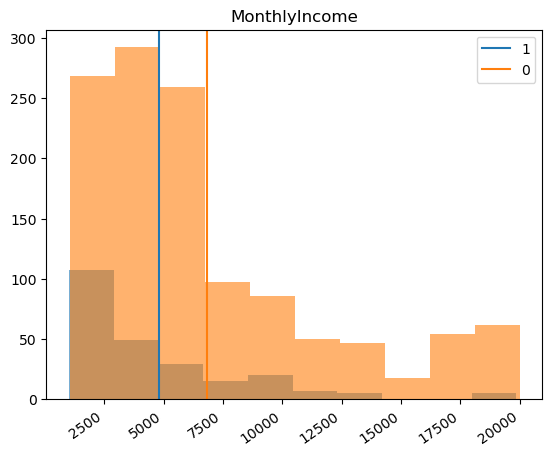

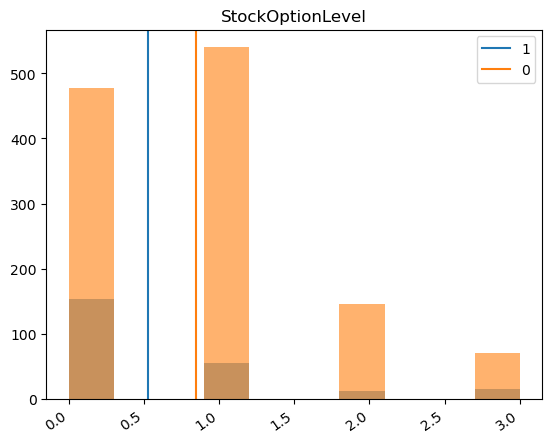

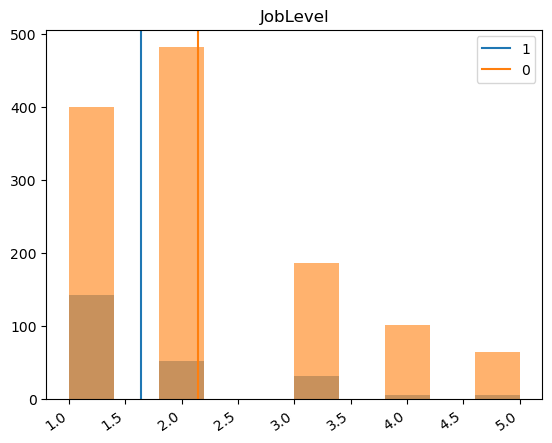

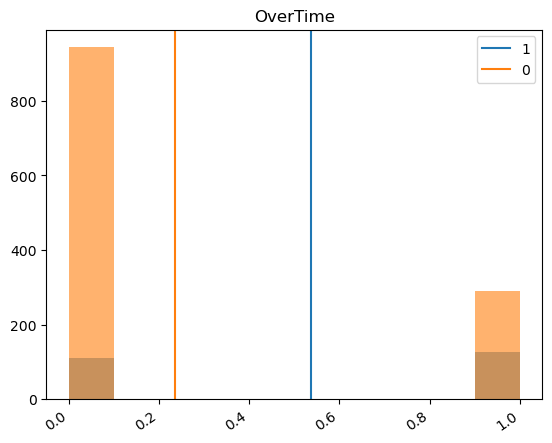

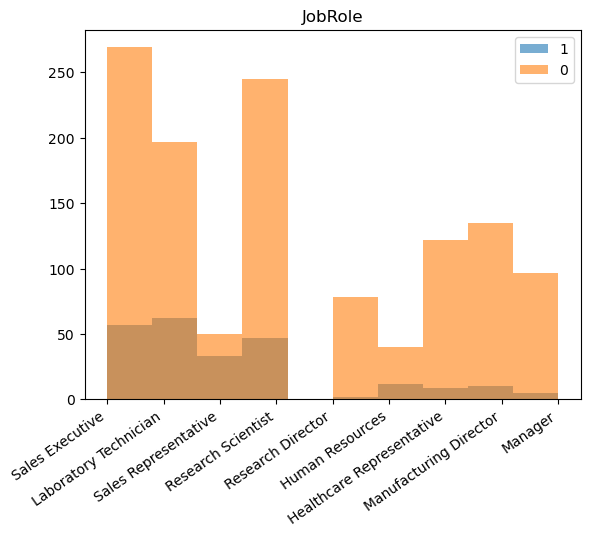

In [62]:
names = ["DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyRate", "NumCompaniesWorked",
         "PercentSalaryHike", "TrainingTimesLastYear", "YearsSinceLastPromotion",
         "PerformanceRating", "Gender", "Education", "High_satisfaction", "Department",
         "WorkLifeBalance", "EducationField", "Low_satisfaction", "BusinessTravel",
         "JobInvolvement", "YearsInCurrentRole", "MaritalStatus", "Age", "YearsWithCurrManager",
         "YearsAtCompany", "TotalWorkingYears", "MonthlyIncome", "StockOptionLevel", "JobLevel",
         "OverTime", "JobRole"]

# We create a dataset containing all the previous variables
explorationDf = pd.concat([Y, HR_data[names]], axis = 1)

# Using a loop we will iterate the names of the classes to be explored, and we will call the function for each name
for feature in names:
    if pd.api.types.is_numeric_dtype(explorationDf[feature]):
        create_histogram(explorationDf, 'Attrition', feature, True)
    else:
        create_histogram(explorationDf, 'Attrition', feature)

Considering that the proportion of values of each class is not equal (are much fewer observations of class 1), we can not observe big diffrences between the distributions of the variables. There are only some subtle differences sometimes, for example:

- In the variable "Low_satisfaction", the mean value is higher for class 1
- In the variable "High_satisfaction" the mean value is lower for class 0
- The "JobInvolvement" mean is lower for class 1
- In the variables "YearsWithCurrentManager", "YearsAtCompany", "TotalWorkingYears", and "YearsInCurrentRole" the mean is lower for class 1
- In "MaritalStatus" for class 0 the most common category is "Married", but for class 1 is "Single"
- The mean of "Age" is lower for class 1
- The "Overtime" mean value is considerably higher for class 1

There are more differences, however, these are some that are easy to observe. Even if the differences are not very accentuated, there is a pattern for class 1, which is people with lower satisfaction and job involvement, the time they have been in their current employment situation is lower, and people who are mostly Single, Younger than the people from the class 0, and who are exposed to OverTime significantly more.

We also need to consider that for the first variables (those with lower importance according to our previous analysis in the previous version of this project), even if the mean ax_vline is not overlapped, are very close (much more closer than the last variables). For this reason, the importance analysis what was done in the previous project seems right.

Now we will make a similar analysis but for the correlations (only for the cuantitative continuous variables).

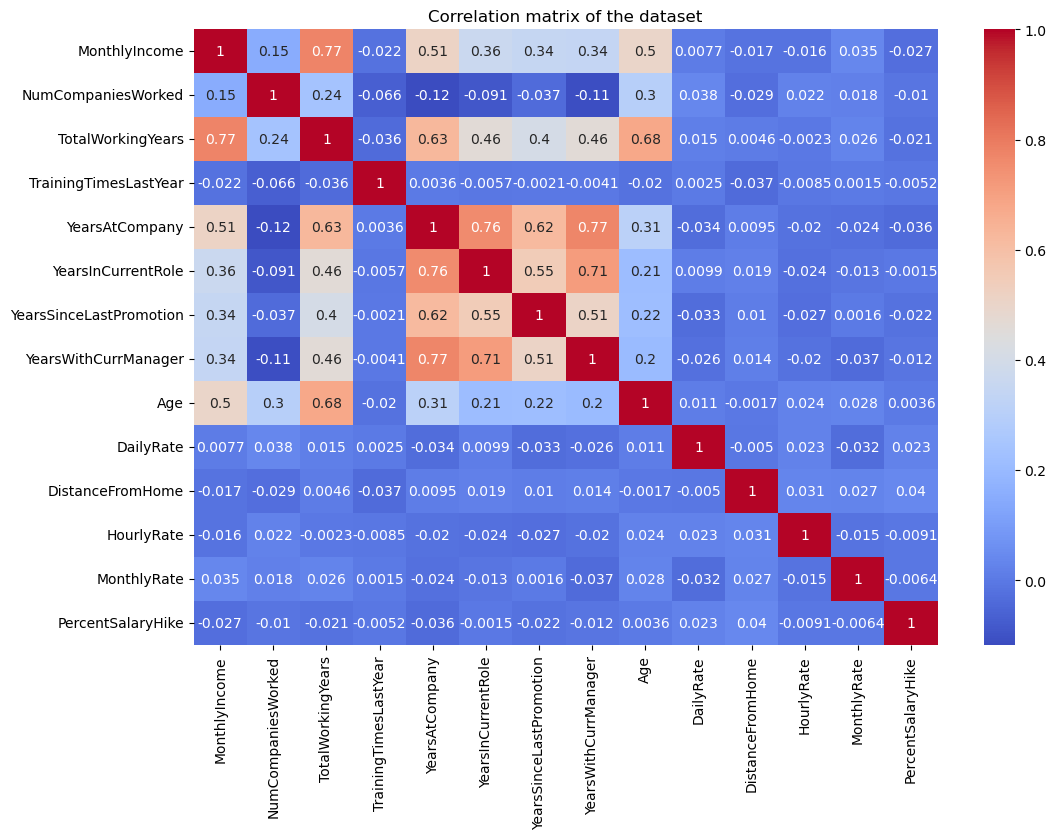

In [63]:
import seaborn as sns
# First we create the correlation matrix without considering the target variable values
correlation_matrix = numeric_variables.corr()
# Now we visualize this matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of the dataset')
plt.show()

Now we will make the same matrix, but considering the class of the variables (for each class we will create a separated matrix).

In [64]:
# We create a dataset containing the cuantitative variables and the target variable
target_cuantitative = pd.concat([Y, numeric_variables], axis = 1)

# We create a separate data frame for each class and we exclude the "Attrition" column (we only used it for filtering the data)
# CLASS 1
only_class1 = target_cuantitative[target_cuantitative['Attrition']==1]
only_class1 = only_class1.drop(columns=['Attrition'])
# Creating correlation matrix
correlation_class1 = only_class1.corr()

# CLASS 0
only_class0 = target_cuantitative[target_cuantitative['Attrition']==0]
only_class0 = only_class0.drop(columns=['Attrition'])
# Creating correlation matrix
correlation_class0 = only_class0.corr()

Now we will visualize these correlation matrixes

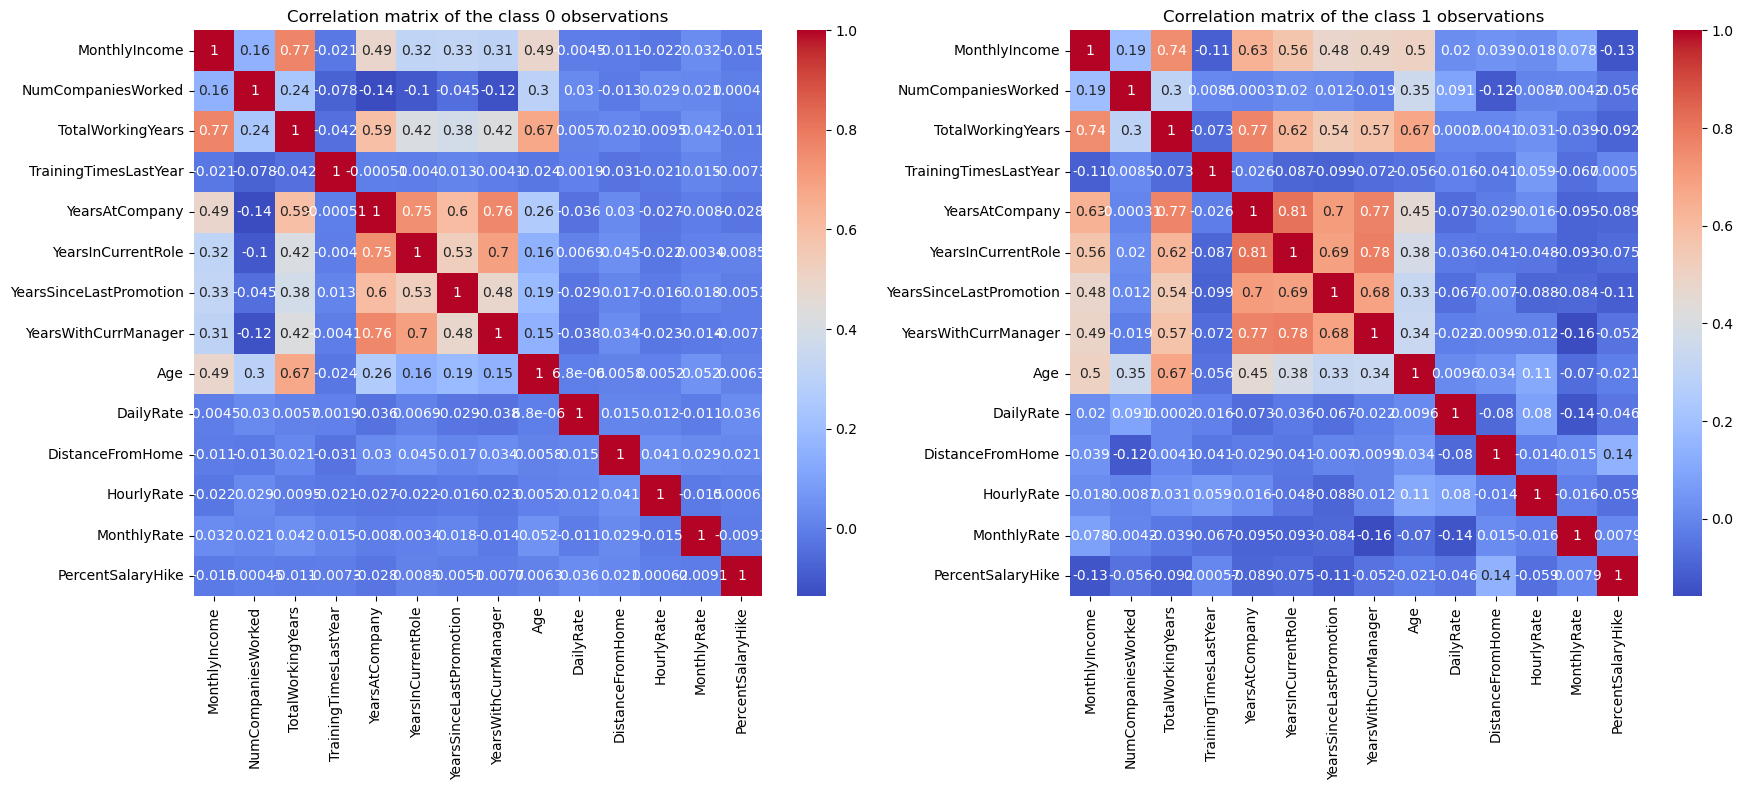

In [65]:
# We create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Correlation matrix for class 0
sns.heatmap(correlation_class0, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation matrix of the class 0 observations')

# Correlation matrix for class 1
sns.heatmap(correlation_class1, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation matrix of the class 1 observations')

# Me show the figure of both correlation matrixes
plt.tight_layout()  # We use "tight_layout" for avoiding overlappings
plt.show()

# 2 - CREATING A MODEL

<div class="alert alert-block alert-info">
We will create a model exhaustively searching which parameters are working better for this data. We will use the "Random Forest Classifier", as this model allows using both, categorical and numeric continuous variables so that we can use most of the variables. First, we will ensemble the dataset that we are going to use, after, we will split it into train and test data, and finally, we will do an intensive search of the best configuration of parameters of the model.

</div>

## 2.1 - Data preprocessing and train test split

In the dataset for training this model we will use the obtained satisfaction variables instead of the original variables. However we need to transform the character variables that may contain this dataframe, because RandomForest requires only numeric variables.

In [66]:
# We will check the unique values of each column in this data frame
for column in categorical_variables.columns:
    unique_values = categorical_variables[column].unique()
    print(f"Unique values in the column {column}: {unique_values}")

Unique values in the column BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in the column Department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in the column Education: [2 1 4 3 5]
Unique values in the column EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in the column Gender: ['Female' 'Male']
Unique values in the column JobInvolvement: [3 2 4 1]
Unique values in the column JobLevel: [2 1 3 4 5]
Unique values in the column JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in the column MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in the column OverTime: [1 0]
Unique values in the column PerformanceRating: [3 4]
Unique values in the column StockOptionLevel: [0 1 3 2]
Unique values in 

We see some cases where the unique values are characters. We will recode these to numeric.

In [67]:
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para almacenar los codificadores utilizados
label_encoders = {}

categoric_recoded_variables = categorical_variables.copy()
for column in categoric_recoded_variables.columns:
    if categoric_recoded_variables[column].dtype == 'object':  # We only tranform the categoric variables
        le = LabelEncoder()
        categoric_recoded_variables[column] = le.fit_transform(categoric_recoded_variables[column])
        label_encoders[column] = le  # We save the codifier for each column
        
# We will check the unique values of each column in this data frame
for column in categoric_recoded_variables.columns:
    unique_values = categoric_recoded_variables[column].unique()
    print(f"Unique values in the column {column}: {unique_values}")

Unique values in the column BusinessTravel: [2 1 0]
Unique values in the column Department: [2 1 0]
Unique values in the column Education: [2 1 4 3 5]
Unique values in the column EducationField: [1 4 3 2 5 0]
Unique values in the column Gender: [0 1]
Unique values in the column JobInvolvement: [3 2 4 1]
Unique values in the column JobLevel: [2 1 3 4 5]
Unique values in the column JobRole: [7 6 2 4 0 3 8 5 1]
Unique values in the column MaritalStatus: [2 1 0]
Unique values in the column OverTime: [1 0]
Unique values in the column PerformanceRating: [3 4]
Unique values in the column StockOptionLevel: [0 1 3 2]
Unique values in the column WorkLifeBalance: [1 3 2 4]


In [68]:
import numpy as np
data_for_model = pd.concat([obtained_satisfaction, categoric_recoded_variables, numeric_variables], axis=1)

categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

In [72]:
# Train test split
# We import train_test_split from sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# We do the split
# For this first we convert to an unidimensional array the "y" dataset
Y=Y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(data_for_model, Y, test_size=0.2, random_state=1)

# Configurar SMOTENC con los índices de las columnas categóricas
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Aplicar sobremuestreo solo en los datos de entrenamiento
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [75]:
# Configuration of "RandomForestClassifier"
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.85


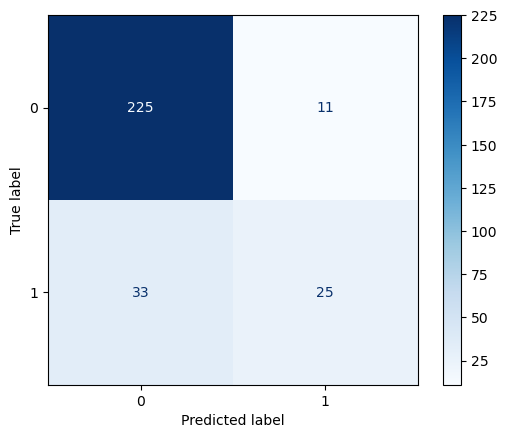

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Puedes cambiar el cmap si lo deseas
plt.show()

In [ ]:
n_estimators = list(range(10, 101, 10))
min_samples = list(range(5, 50, 5))

In [ ]:
from sklearn import model_selection
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}
clf = RandomForestClassifier()

grid = model_selection.GridSearchCV(estimator=clf, param_grid=gr_space, scoring='accuracy')
grid_search=grid.fit(X_resampled, y_resampled)

results_df = pd.DataFrame(grid_search.cv_results_)

In [89]:
results_df[results_df["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
184,2.986662,0.128572,0.058025,0.005972,10,10,1,500,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.706767,0.929825,0.927318,0.914787,0.91206,0.878151,0.085968,1


In [92]:
clf = RandomForestClassifier(max_depth = 10, max_features = 10, min_samples_leaf=1, n_estimators=500)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)


Accuracy: 0.84


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

Accuracy: 0.84
Precision: 0.61
Recall: 0.47
F1-Score: 0.53


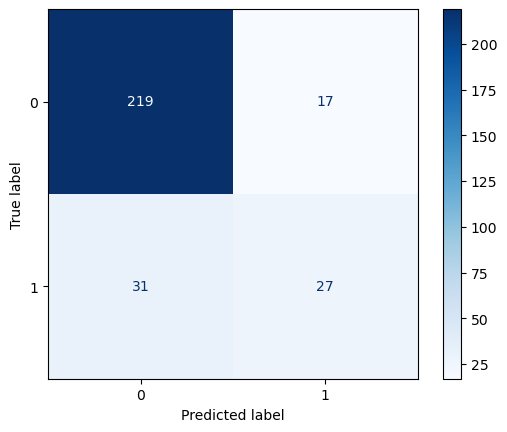

In [93]:
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Puedes cambiar el cmap si lo deseas
plt.show()

In [ ]:
### GridSearch using "F1-score" as scoring measure.
grid = model_selection.GridSearchCV(estimator=clf, param_grid=gr_space, scoring='accuracy')
grid_search=grid.fit(X_resampled, y_resampled)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[results_df["rank_test_score"]==1]

<div class="alert alert-block alert-success">
<strong>VERDE</strong>

</div>

<div class="alert alert-block alert-info">
<strong>AZUL</strong>

</div>

<div class="alert alert-block alert-danger">
<strong>ROJO</strong>
</div>